# Head

In [2]:
import pandas as pd
from pathlib import Path
home = Path.home()

# models = ['deepseek_v3', 'gemma3', 'llama4', 'qwq', 'qwen3']
models = ['deepseek_v3', 'gemma3', 'llama4', 'qwq']

# suffixes = None
suffixes = '_sent_shuffle'
# suffixes = '_tail'
if suffixes is not None:
    csv_files = [home / f'projects/TLDR/data/paper_html_10.1038/abs_annotation/generated_annotations/{model}_TLDR{suffixes}.txt' for model in models]
else:
    csv_files = [home / f'projects/TLDR/data/paper_html_10.1038/abs_annotation/generated_annotations/{model}_TLDR.txt' for model in models]

df = pd.read_csv(home / 'projects/TLDR/data/paper_html_10.1038/abs_annotation/test.tsv', sep='\t')
for model, csv_file in zip(models, csv_files):
    single_df = pd.read_csv(csv_file, sep='\t', header=None, names=[model])
    df = df.join(single_df)

for index in pd.read_csv(home / "projects/TLDR/description/invalid_entry_in_test.txt", sep='\t', header=None).values.flatten().tolist():
    df = df.drop(index-2)  # Adjusting for zero-based index
df

,doi,paper_id,abstract,annotation,deepseek_v3,gemma3,llama4,qwq
0,10.1073/pnas.91.7.2757,107202074,The origin and taxonomic status of domesticate...,A demonstration that cattle have been domestic...,This study examines mtDNA sequences from tauri...,Reference 14 reports phylogenetic analysis of ...,These authors investigated the evolutionary hi...,This study uses mitochondrial DNA sequencing t...
1,10.1093/genetics/154.4.1785,83366887,Abstract The domestic pig originates from the ...,Evidence is presented for independent domestic...,This study provides molecular evidence for the...,This study demonstrates independent domesticat...,These findings indicate that there has been ge...,This study provides molecular evidence for int...
2,10.1073/pnas.96.16.9252,122095374,We previously mapped a quantitative trait locu...,This paper shows how the identity-by-descent a...,This study reports the fine-mapping of a QTL a...,This paper reports the fine-mapping of a QTL a...,Fine mapping a QTL for milk fat percentage on ...,This study refines the mapping of a quantitati...
3,10.1101/gr.10.2.220,100831446,A genome-wide linkage disequilibrium (LD) map ...,The pattern of linkage disequilibrium (LD) acr...,This study provides an early genome-wide analy...,This paper reports an extensive LD map in dair...,This study evaluates the potential of LD mappi...,This study investigates linkage disequilibrium...
4,10.1126/science.8134840,17452622,The European wild boar was crossed with the do...,The first paper to show the use of divergent i...,This study reports the mapping of a major quan...,This study identifies a major QTL on chromosom...,This study identifies a major locus on pig chr...,This study identifies a major quantitative tra...
...,...,...,...,...,...,...,...,...
35631,10.2337/db08-1168,4860455,OBJECTIVE—Regulatory T-cells (Tregs) have cata...,This article describes the good manufacturing ...,This study demonstrates the feasibility of iso...,Reference 51 describes an optimized method for...,These studies demonstrate the feasibility of t...,This study evaluates the expansion and functio...
35632,10.1126/science.aar3246,4860145,Engineering cytokine-receptor pairs Interleuki...,This study reports the generation of an orthog...,This study describes the engineering of orthog...,Reference 54 reports the successful engineerin...,This study demonstrates that a synthetic IL-2:...,This study introduces engineered synthetic IL-...
35633,10.1126/science.aad2791,62290395,T cells target peptide combos One of the endur...,This article shows that some diabetogenic T ce...,This study identifies hybrid insulin peptides ...,This study identified that autoreactive T cell...,T cells isolated from the pancreatic islets of...,This study identifies that T cells in type 1 d...
35634,10.1073/pnas.1902566116,82979762,Polymorphic HLAs form the primary immune barri...,This article describes the development of gene...,This study describes a multiplex genome-editin...,This work describes a new method to render all...,This study provides evidence for genome-edited...,This study presents a multiplex genome-editing...


# Load publication venue and year from MAG

In [3]:
import pickle
print("Loading doi_mag_pid_dict...")
with open(home / "projects/TLDR/data/doi_mag_pid_dict.pkl", "rb") as f:
    doi_mag_pid_dict = pickle.load(f)
    print("doi_mag_pid_dict loaded.")

df['mag_pid'] = df['doi'].map(doi_mag_pid_dict)
df = df.dropna(subset=['mag_pid'])
df.loc[:, 'mag_pid'] = df['mag_pid'].apply(lambda x: x.split(';')[0] if isinstance(x, str) else x)
df.loc[:, 'mag_pid'] = df['mag_pid'].astype(int)
display(df)

Loading doi_mag_pid_dict...
doi_mag_pid_dict loaded.


,doi,paper_id,abstract,annotation,deepseek_v3,gemma3,llama4,qwq,mag_pid
0,10.1073/pnas.91.7.2757,107202074,The origin and taxonomic status of domesticate...,A demonstration that cattle have been domestic...,This study examines mtDNA sequences from tauri...,Reference 14 reports phylogenetic analysis of ...,These authors investigated the evolutionary hi...,This study uses mitochondrial DNA sequencing t...,2005395185
1,10.1093/genetics/154.4.1785,83366887,Abstract The domestic pig originates from the ...,Evidence is presented for independent domestic...,This study provides molecular evidence for the...,This study demonstrates independent domesticat...,These findings indicate that there has been ge...,This study provides molecular evidence for int...,2110049233
2,10.1073/pnas.96.16.9252,122095374,We previously mapped a quantitative trait locu...,This paper shows how the identity-by-descent a...,This study reports the fine-mapping of a QTL a...,This paper reports the fine-mapping of a QTL a...,Fine mapping a QTL for milk fat percentage on ...,This study refines the mapping of a quantitati...,2082900742
3,10.1101/gr.10.2.220,100831446,A genome-wide linkage disequilibrium (LD) map ...,The pattern of linkage disequilibrium (LD) acr...,This study provides an early genome-wide analy...,This paper reports an extensive LD map in dair...,This study evaluates the potential of LD mappi...,This study investigates linkage disequilibrium...,2103106090
4,10.1126/science.8134840,17452622,The European wild boar was crossed with the do...,The first paper to show the use of divergent i...,This study reports the mapping of a major quan...,This study identifies a major QTL on chromosom...,This study identifies a major locus on pig chr...,This study identifies a major quantitative tra...,2045457895
...,...,...,...,...,...,...,...,...,...
35631,10.2337/db08-1168,4860455,OBJECTIVE—Regulatory T-cells (Tregs) have cata...,This article describes the good manufacturing ...,This study demonstrates the feasibility of iso...,Reference 51 describes an optimized method for...,These studies demonstrate the feasibility of t...,This study evaluates the expansion and functio...,2137227986
35632,10.1126/science.aar3246,4860145,Engineering cytokine-receptor pairs Interleuki...,This study reports the generation of an orthog...,This study describes the engineering of orthog...,Reference 54 reports the successful engineerin...,This study demonstrates that a synthetic IL-2:...,This study introduces engineered synthetic IL-...,2789780246
35633,10.1126/science.aad2791,62290395,T cells target peptide combos One of the endur...,This article shows that some diabetogenic T ce...,This study identifies hybrid insulin peptides ...,This study identified that autoreactive T cell...,T cells isolated from the pancreatic islets of...,This study identifies that T cells in type 1 d...,2266478788
35634,10.1073/pnas.1902566116,82979762,Polymorphic HLAs form the primary immune barri...,This article describes the development of gene...,This study describes a multiplex genome-editin...,This work describes a new method to render all...,This study provides evidence for genome-edited...,This study presents a multiplex genome-editing...,2943378944


In [4]:
MAG_paper_df = pd.read_parquet(home / 'projects/TLDR/data/MAG_paper.parquet')
df = df.merge(MAG_paper_df[['VenueID', 'Year']], left_on='mag_pid', right_index=True, how='inner')
df.rename(columns={'VenueID': 'mag_vid', 'Year': 'year'}, inplace=True)
display(df)

,doi,paper_id,abstract,annotation,deepseek_v3,gemma3,llama4,qwq,mag_pid,mag_vid,year
0,10.1073/pnas.91.7.2757,107202074,The origin and taxonomic status of domesticate...,A demonstration that cattle have been domestic...,This study examines mtDNA sequences from tauri...,Reference 14 reports phylogenetic analysis of ...,These authors investigated the evolutionary hi...,This study uses mitochondrial DNA sequencing t...,2005395185,125754415,1994
1,10.1093/genetics/154.4.1785,83366887,Abstract The domestic pig originates from the ...,Evidence is presented for independent domestic...,This study provides molecular evidence for the...,This study demonstrates independent domesticat...,These findings indicate that there has been ge...,This study provides molecular evidence for int...,2110049233,65932378,2000
2,10.1073/pnas.96.16.9252,122095374,We previously mapped a quantitative trait locu...,This paper shows how the identity-by-descent a...,This study reports the fine-mapping of a QTL a...,This paper reports the fine-mapping of a QTL a...,Fine mapping a QTL for milk fat percentage on ...,This study refines the mapping of a quantitati...,2082900742,125754415,1999
3,10.1101/gr.10.2.220,100831446,A genome-wide linkage disequilibrium (LD) map ...,The pattern of linkage disequilibrium (LD) acr...,This study provides an early genome-wide analy...,This paper reports an extensive LD map in dair...,This study evaluates the potential of LD mappi...,This study investigates linkage disequilibrium...,2103106090,43092948,2000
4,10.1126/science.8134840,17452622,The European wild boar was crossed with the do...,The first paper to show the use of divergent i...,This study reports the mapping of a major quan...,This study identifies a major QTL on chromosom...,This study identifies a major locus on pig chr...,This study identifies a major quantitative tra...,2045457895,3880285,1994
...,...,...,...,...,...,...,...,...,...,...,...
35631,10.2337/db08-1168,4860455,OBJECTIVE—Regulatory T-cells (Tregs) have cata...,This article describes the good manufacturing ...,This study demonstrates the feasibility of iso...,Reference 51 describes an optimized method for...,These studies demonstrate the feasibility of t...,This study evaluates the expansion and functio...,2137227986,129060628,2009
35632,10.1126/science.aar3246,4860145,Engineering cytokine-receptor pairs Interleuki...,This study reports the generation of an orthog...,This study describes the engineering of orthog...,Reference 54 reports the successful engineerin...,This study demonstrates that a synthetic IL-2:...,This study introduces engineered synthetic IL-...,2789780246,3880285,2018
35633,10.1126/science.aad2791,62290395,T cells target peptide combos One of the endur...,This article shows that some diabetogenic T ce...,This study identifies hybrid insulin peptides ...,This study identified that autoreactive T cell...,T cells isolated from the pancreatic islets of...,This study identifies that T cells in type 1 d...,2266478788,3880285,2016
35634,10.1073/pnas.1902566116,82979762,Polymorphic HLAs form the primary immune barri...,This article describes the development of gene...,This study describes a multiplex genome-editin...,This work describes a new method to render all...,This study provides evidence for genome-edited...,This study presents a multiplex genome-editing...,2943378944,125754415,2019


# Load subject label

In [5]:
label_df = pd.read_parquet(home / 'projects/TLDR/data/cluster_df.parquet')
label_df

,Scopus_label,movMF_label,movMF_distance,x_val,y_val,kmeans_label,kmeans_distance,skm_label,skm_distance,spectral_label,n2v_kmeans_label,cm_kmeans_label,gnn_kmeans_label,bert_kmeans_label
202381698,Multidisciplinary,22,0.445886,-67.928200,15.572327,17,0.628846,20,0.444711,24,3,21,0,0
137773608,Multidisciplinary,22,0.590942,-68.405334,-55.633186,17,0.735654,20,0.559494,24,20,21,0,3
125754415,Multidisciplinary,22,0.574571,-68.448853,-55.613579,17,0.705024,20,0.550081,24,20,21,0,0
3880285,Multidisciplinary,23,0.618842,-68.407288,-55.634430,8,0.724859,17,0.610582,24,20,21,0,3
111155417,Chemistry,23,0.220853,-54.506985,-61.217068,11,0.495787,12,0.198758,14,4,24,21,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2764485818,Medicine,21,0.268070,-28.969574,34.819569,18,0.542531,14,0.251015,8,18,1,19,1
83454320,Arts and Humanities,25,0.034777,78.609909,31.736822,13,0.251599,3,0.056642,21,5,1,14,1
16507453,Arts and Humanities,6,0.113656,89.206772,17.625090,13,0.307089,3,0.128660,21,5,1,14,1
121509672,Agricultural and Biological Sciences,5,0.179111,-36.757057,-0.591017,21,0.430040,16,0.207435,10,5,1,10,1


In [6]:
df = df.merge(label_df[['kmeans_label', 'Scopus_label']], left_on='mag_vid', right_index=True, how='inner')
df.rename(columns={'kmeans_label': 'p2v_label', 'Scopus_label': 'scopus_label'}, inplace=True)
df

,doi,paper_id,abstract,annotation,deepseek_v3,gemma3,llama4,qwq,mag_pid,mag_vid,year,p2v_label,scopus_label
0,10.1073/pnas.91.7.2757,107202074,The origin and taxonomic status of domesticate...,A demonstration that cattle have been domestic...,This study examines mtDNA sequences from tauri...,Reference 14 reports phylogenetic analysis of ...,These authors investigated the evolutionary hi...,This study uses mitochondrial DNA sequencing t...,2005395185,125754415,1994,17,Multidisciplinary
1,10.1093/genetics/154.4.1785,83366887,Abstract The domestic pig originates from the ...,Evidence is presented for independent domestic...,This study provides molecular evidence for the...,This study demonstrates independent domesticat...,These findings indicate that there has been ge...,This study provides molecular evidence for int...,2110049233,65932378,2000,17,"Biochemistry, Genetics and Molecular Biology"
2,10.1073/pnas.96.16.9252,122095374,We previously mapped a quantitative trait locu...,This paper shows how the identity-by-descent a...,This study reports the fine-mapping of a QTL a...,This paper reports the fine-mapping of a QTL a...,Fine mapping a QTL for milk fat percentage on ...,This study refines the mapping of a quantitati...,2082900742,125754415,1999,17,Multidisciplinary
3,10.1101/gr.10.2.220,100831446,A genome-wide linkage disequilibrium (LD) map ...,The pattern of linkage disequilibrium (LD) acr...,This study provides an early genome-wide analy...,This paper reports an extensive LD map in dair...,This study evaluates the potential of LD mappi...,This study investigates linkage disequilibrium...,2103106090,43092948,2000,17,"Biochemistry, Genetics and Molecular Biology"
4,10.1126/science.8134840,17452622,The European wild boar was crossed with the do...,The first paper to show the use of divergent i...,This study reports the mapping of a major quan...,This study identifies a major QTL on chromosom...,This study identifies a major locus on pig chr...,This study identifies a major quantitative tra...,2045457895,3880285,1994,8,Multidisciplinary
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35631,10.2337/db08-1168,4860455,OBJECTIVE—Regulatory T-cells (Tregs) have cata...,This article describes the good manufacturing ...,This study demonstrates the feasibility of iso...,Reference 51 describes an optimized method for...,These studies demonstrate the feasibility of t...,This study evaluates the expansion and functio...,2137227986,129060628,2009,17,Medicine
35632,10.1126/science.aar3246,4860145,Engineering cytokine-receptor pairs Interleuki...,This study reports the generation of an orthog...,This study describes the engineering of orthog...,Reference 54 reports the successful engineerin...,This study demonstrates that a synthetic IL-2:...,This study introduces engineered synthetic IL-...,2789780246,3880285,2018,8,Multidisciplinary
35633,10.1126/science.aad2791,62290395,T cells target peptide combos One of the endur...,This article shows that some diabetogenic T ce...,This study identifies hybrid insulin peptides ...,This study identified that autoreactive T cell...,T cells isolated from the pancreatic islets of...,This study identifies that T cells in type 1 d...,2266478788,3880285,2016,8,Multidisciplinary
35634,10.1073/pnas.1902566116,82979762,Polymorphic HLAs form the primary immune barri...,This article describes the development of gene...,This study describes a multiplex genome-editin...,This work describes a new method to render all...,This study provides evidence for genome-edited...,This study presents a multiplex genome-editing...,2943378944,125754415,2019,17,Multidisciplinary


In [41]:
df['p2v_label'].value_counts()

p2v_label
17    18439
8      9625
6      1457
7      1028
4       627
9       611
11      580
22      404
18      363
21      319
12      292
20      121
1        60
3        49
14       32
5        25
24       21
16       21
15       17
2        16
23       16
0        10
19        6
13        5
25        2
Name: count, dtype: int64

In [8]:
df['scopus_label'].value_counts()

scopus_label
Multidisciplinary                               15639
Medicine                                         5262
Immunology and Microbiology                      4146
Biochemistry, Genetics and Molecular Biology     4116
Chemistry                                        1285
Neuroscience                                     1211
Agricultural and Biological Sciences              704
Social Sciences                                   608
Earth and Planetary Sciences                      235
Materials Science                                 179
Psychology                                        156
Physics and Astronomy                             139
Pharmacology, Toxicology and Pharmaceutics        128
Environmental Science                             119
Energy                                             39
Mathematics                                        30
Engineering                                        28
Computer Science                                   24
Nursing        

# Predict subject

## 10-fold cv

In [8]:
import pandas as pd
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_validate, StratifiedKFold
from tqdm import tqdm

class ProgressHashingVectorizer(HashingVectorizer):
    """带进度条的HashingVectorizer"""
    def transform(self, X):
        if hasattr(X, '__len__'):
            self.n_samples_ = len(X)
            wrapped_X = tqdm(X, desc="Vectorizing documents", total=self.n_samples_)
            return super().transform(wrapped_X)
        return super().transform(X)

# text_features = ['abstract', 'annotation', 'deepseek_v3', 'qwen3','gemma3', 'llama4', 'qwq']
text_features = ['abstract', 'annotation'] + models
y = (df['p2v_label'] == 17).astype(int)  # 17为1，否则为0

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scoring = ['accuracy', 'precision', 'recall', 'f1']

results = []
for feat in text_features:
    print(f"Processing feature: {feat}")
    X_text = df[feat].astype(str).fillna('')
    vectorizer = ProgressHashingVectorizer(n_features=2**18, stop_words='english', alternate_sign=False)
    X = vectorizer.transform(X_text)
    clf = MultinomialNB()
    scores = cross_validate(clf, X, y, cv=cv, scoring=scoring, n_jobs=-1, verbose=1)
    res = {
        'feature': feat,
        'accuracy_mean': scores['test_accuracy'].mean(),
        'accuracy_std': scores['test_accuracy'].std(),
        'precision_mean': scores['test_precision'].mean(),
        'precision_std': scores['test_precision'].std(),
        'recall_mean': scores['test_recall'].mean(),
        'recall_std': scores['test_recall'].std(),
        'f1_mean': scores['test_f1'].mean(),
        'f1_std': scores['test_f1'].std(),
    }
    print(
        f"Feature: {feat} | "
        f"Acc: {res['accuracy_mean']:.4f}±{res['accuracy_std']:.4f} | "
        f"Precision: {res['precision_mean']:.4f}±{res['precision_std']:.4f} | "
        f"Recall: {res['recall_mean']:.4f}±{res['recall_std']:.4f} | "
        f"F1: {res['f1_mean']:.4f}±{res['f1_std']:.4f}"
    )
    results.append(res)

results_df = pd.DataFrame(results)
results_df

Processing feature: abstract


Vectorizing documents: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 34146/34146 [00:02<00:00, 16823.73it/s]
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 256 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    0.6s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.7s finished


Feature: abstract | Acc: 0.6962±0.0039 | Precision: 0.6544±0.0022 | Recall: 0.9270±0.0074 | F1: 0.7672±0.0035
Processing feature: annotation


Vectorizing documents: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 34146/34146 [00:00<00:00, 96090.98it/s]
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 256 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    0.5s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.7s finished


Feature: annotation | Acc: 0.6411±0.0043 | Precision: 0.6133±0.0028 | Recall: 0.9076±0.0078 | F1: 0.7320±0.0036
Processing feature: deepseek_v3


Vectorizing documents: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 34146/34146 [00:00<00:00, 52099.23it/s]
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 256 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    0.5s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.7s finished


Feature: deepseek_v3 | Acc: 0.6631±0.0038 | Precision: 0.6313±0.0026 | Recall: 0.9043±0.0067 | F1: 0.7435±0.0032
Processing feature: gemma3


Vectorizing documents: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 34146/34146 [00:00<00:00, 82126.75it/s]
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 256 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    0.5s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.7s finished


Feature: gemma3 | Acc: 0.6622±0.0079 | Precision: 0.6313±0.0055 | Recall: 0.8999±0.0089 | F1: 0.7421±0.0059
Processing feature: llama4


Vectorizing documents: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 34146/34146 [00:00<00:00, 41301.66it/s]
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 256 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    0.5s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.7s finished


Feature: llama4 | Acc: 0.6516±0.0055 | Precision: 0.6242±0.0042 | Recall: 0.8921±0.0056 | F1: 0.7344±0.0036
Processing feature: qwq


Vectorizing documents: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 34146/34146 [00:01<00:00, 32375.28it/s]
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 256 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    0.6s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.7s finished


Feature: qwq | Acc: 0.6636±0.0039 | Precision: 0.6330±0.0028 | Recall: 0.8973±0.0077 | F1: 0.7423±0.0033


,feature,accuracy_mean,accuracy_std,precision_mean,precision_std,recall_mean,recall_std,f1_mean,f1_std
0,abstract,0.696246,0.003894,0.654427,0.002232,0.927002,0.007353,0.767215,0.003539
1,annotation,0.641100,0.004256,0.613316,0.002769,0.907641,0.007798,0.731988,0.003620
2,deepseek_v3,0.663065,0.003774,0.631253,0.002584,0.904333,0.006696,0.743501,0.003178
3,gemma3,0.662157,0.007899,0.631344,0.005537,0.899886,0.008865,0.742050,0.005874
4,llama4,0.651614,0.005473,0.624158,0.004231,0.892076,0.005578,0.734433,0.003638
5,qwq,0.663592,0.003870,0.632998,0.002816,0.897282,0.007682,0.742303,0.003312


## no cv

In [15]:
import pandas as pd
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tqdm import tqdm

class ProgressHashingVectorizer(HashingVectorizer):
    """带进度条的HashingVectorizer"""
    def transform(self, X):
        if hasattr(X, '__len__'):
            self.n_samples_ = len(X)
            wrapped_X = tqdm(X, desc="Vectorizing documents", total=self.n_samples_)
            return super().transform(wrapped_X)
        return super().transform(X)

text_features = ['abstract', 'annotation', 'deepseek_v3', 'gemma3', 'llama4', 'qwq']
# 二分类标签：是否为17
y = (df['p2v_label'] == 17).astype(int)  # 17为1，否则为0

results = []
for feat in text_features:
    print(f"Processing feature: {feat}")
    X_text = df[feat].astype(str).fillna('')
    X_train, X_test, y_train, y_test = train_test_split(
        X_text, y, test_size=0.1, random_state=42, stratify=y
    )

    vectorizer = ProgressHashingVectorizer(n_features=2**18, stop_words='english', alternate_sign=False)
    X_train_vec = vectorizer.transform(X_train)
    X_test_vec = vectorizer.transform(X_test)
    clf = MultinomialNB()
    clf.fit(X_train_vec, y_train)
    y_pred = clf.predict(X_test_vec)

    res = {
        'feature': feat,
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred, zero_division=0),
        'recall': recall_score(y_test, y_pred, zero_division=0),
        'f1': f1_score(y_test, y_pred, zero_division=0),
    }
    print(
        f"Feature: {feat} | "
        f"Accuracy: {res['accuracy']:.4f} | "
        f"Precision: {res['precision']:.4f} | "
        f"Recall: {res['recall']:.4f} | "
        f"F1: {res['f1']:.4f}"
    )
    results.append(res)

results_df = pd.DataFrame(results)
results_df

Processing feature: abstract


Vectorizing documents: 100%|█████████████████████████████████████████████| 3415/3415 [00:00<00:00, 21465.83it/s]


Feature: abstract | Accuracy: 0.6972 | Precision: 0.6540 | Recall: 0.9328 | F1: 0.7689
Processing feature: annotation


Vectorizing documents: 100%|████████████████████████████████████████████| 3415/3415 [00:00<00:00, 137783.39it/s]


Feature: annotation | Accuracy: 0.6442 | Precision: 0.6150 | Recall: 0.9121 | F1: 0.7347
Processing feature: deepseek_v3


Vectorizing documents: 100%|█████████████████████████████████████████████| 3415/3415 [00:00<00:00, 73381.46it/s]


Feature: deepseek_v3 | Accuracy: 0.6656 | Precision: 0.6333 | Recall: 0.9046 | F1: 0.7450
Processing feature: gemma3


Vectorizing documents: 100%|████████████████████████████████████████████| 3415/3415 [00:00<00:00, 110159.96it/s]


Feature: gemma3 | Accuracy: 0.6723 | Precision: 0.6389 | Recall: 0.9040 | F1: 0.7487
Processing feature: llama4


Vectorizing documents: 100%|█████████████████████████████████████████████| 3415/3415 [00:00<00:00, 84019.43it/s]


Feature: llama4 | Accuracy: 0.6624 | Precision: 0.6299 | Recall: 0.9084 | F1: 0.7439
Processing feature: qwq


Vectorizing documents: 100%|█████████████████████████████████████████████| 3415/3415 [00:00<00:00, 44519.71it/s]

Feature: qwq | Accuracy: 0.6685 | Precision: 0.6364 | Recall: 0.9008 | F1: 0.7458


,feature,accuracy,precision,recall,f1
0,abstract,0.697218,0.653992,0.932755,0.768887
1,annotation,0.644217,0.614991,0.912148,0.734658
2,deepseek_v3,0.665593,0.633257,0.904555,0.744975
3,gemma3,0.672328,0.638942,0.904013,0.748709
4,llama4,0.662372,0.629936,0.908351,0.743948
5,qwq,0.668521,0.636398,0.900759,0.745846


# Predict year

In [9]:
df['year'].describe()

count    34146.000000
mean      2006.680724
std          9.105688
min       1887.000000
25%       2001.000000
50%       2007.000000
75%       2014.000000
max       2022.000000
Name: year, dtype: float64

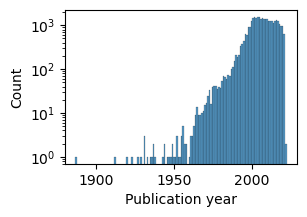

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(3, 2))
sns.histplot(df, x='year', stat='count', discrete=True)
plt.xlabel('Publication year')
plt.yscale('log')
plt.ylabel('Count')
plt.show()

## 10-fold cv

In [7]:
import pandas as pd
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import KFold, cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from tqdm import tqdm

class ProgressHashingVectorizer(HashingVectorizer):
    """带进度条的HashingVectorizer"""
    def transform(self, X):
        if hasattr(X, '__len__'):
            self.n_samples_ = len(X)
            wrapped_X = tqdm(X, desc="Vectorizing documents", total=self.n_samples_)
            return super().transform(wrapped_X)
        return super().transform(X)

# 指标: Accuracy, Precision, Recall, F1
scoring = {
    'Accuracy': make_scorer(accuracy_score),
    'Precision': make_scorer(precision_score),
    'Recall': make_scorer(recall_score),
    'F1': make_scorer(f1_score)
}

text_features = ['abstract', 'annotation', 'deepseek_v3', 'gemma3', 'llama4', 'qwq']
y = (df['year'] >= 2008).astype(int)

cv = KFold(n_splits=10, shuffle=True, random_state=42)

results = []
for feat in text_features:
    print(f"Processing feature: {feat}")
    X_text = df[feat].astype(str).fillna('')
    vectorizer = ProgressHashingVectorizer(n_features=2**20, stop_words='english', alternate_sign=False)
    X = vectorizer.transform(X_text)
    model = MultinomialNB()
    scores = cross_validate(model, X, y, cv=cv, scoring=scoring, n_jobs=-1, verbose=1, return_train_score=False)
    res = {
        'feature': feat,
        'Accuracy_mean': scores['test_Accuracy'].mean(),
        'Accuracy_std': scores['test_Accuracy'].std(),
        'Precision_mean': scores['test_Precision'].mean(),
        'Precision_std': scores['test_Precision'].std(),
        'Recall_mean': scores['test_Recall'].mean(),
        'Recall_std': scores['test_Recall'].std(),
        'F1_mean': scores['test_F1'].mean(),
        'F1_std': scores['test_F1'].std(),
    }
    print(
        f"Feature: {feat} | "
        f"Accuracy: {res['Accuracy_mean']:.4f}±{res['Accuracy_std']:.4f} | "
        f"F1: {res['F1_mean']:.4f}±{res['F1_std']:.4f}"
    )
    results.append(res)

results_df = pd.DataFrame(results)
display(results_df)

Processing feature: abstract


Vectorizing documents: 100%|████████████████████████████████████████████| 34146/34146 [00:01<00:00, 20368.95it/s]
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  10 | elapsed:    4.3s remaining:    6.5s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    4.4s finished


Feature: abstract | Accuracy: 0.7542±0.0080 | F1: 0.7063±0.0094
Processing feature: annotation


Vectorizing documents: 100%|███████████████████████████████████████████| 34146/34146 [00:00<00:00, 133230.67it/s]
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  10 | elapsed:    1.0s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.0s finished


Feature: annotation | Accuracy: 0.7161±0.0090 | F1: 0.6678±0.0120
Processing feature: deepseek_v3


Vectorizing documents: 100%|████████████████████████████████████████████| 34146/34146 [00:00<00:00, 72311.64it/s]
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  10 | elapsed:    0.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.2s finished


Feature: deepseek_v3 | Accuracy: 0.7172±0.0093 | F1: 0.6544±0.0113
Processing feature: gemma3


Vectorizing documents: 100%|███████████████████████████████████████████| 34146/34146 [00:00<00:00, 112990.21it/s]
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  10 | elapsed:    0.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.1s finished


Feature: gemma3 | Accuracy: 0.7114±0.0076 | F1: 0.6574±0.0114
Processing feature: llama4


Vectorizing documents: 100%|████████████████████████████████████████████| 34146/34146 [00:00<00:00, 56922.13it/s]
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  10 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.1s finished


Feature: llama4 | Accuracy: 0.7082±0.0107 | F1: 0.6682±0.0141
Processing feature: qwq


Vectorizing documents: 100%|████████████████████████████████████████████| 34146/34146 [00:00<00:00, 41747.87it/s]
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  10 | elapsed:    0.1s remaining:    0.2s


Feature: qwq | Accuracy: 0.7116±0.0098 | F1: 0.6457±0.0125


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.2s finished


,feature,Accuracy_mean,Accuracy_std,Precision_mean,Precision_std,Recall_mean,Recall_std,F1_mean,F1_std
0,abstract,0.754203,0.008020,0.836492,0.011048,0.611367,0.014414,0.706276,0.009402
1,annotation,0.716131,0.009039,0.768938,0.013663,0.590483,0.016425,0.667834,0.011960
2,deepseek_v3,0.717215,0.009269,0.799932,0.011445,0.553913,0.015737,0.654393,0.011265
3,gemma3,0.711416,0.007554,0.771602,0.010839,0.573048,0.019053,0.657395,0.011420
4,llama4,0.708195,0.010678,0.741881,0.013607,0.607991,0.017708,0.668183,0.014121
5,qwq,0.711563,0.009785,0.794972,0.012332,0.543872,0.016115,0.645722,0.012464


## no cv

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tqdm import tqdm

class ProgressHashingVectorizer(HashingVectorizer):
    """带进度条的HashingVectorizer"""
    def transform(self, X):
        if hasattr(X, '__len__'):
            self.n_samples_ = len(X)
            wrapped_X = tqdm(X, desc="Vectorizing documents", total=self.n_samples_)
            return super().transform(wrapped_X)
        return super().transform(X)

text_features = ['abstract', 'annotation', 'deepseek_v3', 'gemma3', 'llama4', 'qwq']
y = df['year'].astype(int)  # 年份作为连续变量回归

results = []
for feat in text_features:
    print(f"Processing feature: {feat}")
    X_text = df[feat].astype(str).fillna('')
    X_train, X_test, y_train, y_test = train_test_split(
        X_text, y, test_size=0.1, random_state=42
    )

    vectorizer = ProgressHashingVectorizer(n_features=2**18, stop_words='english', alternate_sign=False)
    X_train_vec = vectorizer.transform(X_train)
    X_test_vec = vectorizer.transform(X_test)
    model = Ridge(alpha=1.0)
    model.fit(X_train_vec, y_train)
    y_pred = model.predict(X_test_vec)

    res = {
        'feature': feat,
        'MAE': mean_absolute_error(y_test, y_pred),
        'MSE': mean_squared_error(y_test, y_pred),
        'R2': r2_score(y_test, y_pred),
    }
    print(
        f"Feature: {feat} | "
        f"MAE: {res['MAE']:.4f} | "
        f"R2: {res['R2']:.4f}"
    )
    results.append(res)

results_df = pd.DataFrame(results)
results_df

Processing feature: abstract


Vectorizing documents: 100%|█████████████████████████████████████████████| 3415/3415 [00:00<00:00, 22020.20it/s]


Feature: abstract | MAE: 4.2865 | R2: 0.5755
Processing feature: annotation


Vectorizing documents: 100%|████████████████████████████████████████████| 3415/3415 [00:00<00:00, 130228.28it/s]


Feature: annotation | MAE: 5.5461 | R2: 0.3061
Processing feature: deepseek_v3


Vectorizing documents: 100%|█████████████████████████████████████████████| 3415/3415 [00:00<00:00, 77554.96it/s]


Feature: deepseek_v3 | MAE: 5.0521 | R2: 0.4281
Processing feature: gemma3


Vectorizing documents: 100%|████████████████████████████████████████████| 3415/3415 [00:00<00:00, 120217.45it/s]


Feature: gemma3 | MAE: 5.5035 | R2: 0.3244
Processing feature: llama4


Vectorizing documents: 100%|█████████████████████████████████████████████| 3415/3415 [00:00<00:00, 54197.36it/s]


Feature: llama4 | MAE: 5.5231 | R2: 0.3139
Processing feature: qwq


Vectorizing documents: 100%|█████████████████████████████████████████████| 3415/3415 [00:00<00:00, 44297.08it/s]


Feature: qwq | MAE: 5.0755 | R2: 0.4131


,feature,MAE,MSE,R2
0,abstract,4.286524,34.042876,0.575475
1,annotation,5.546063,55.646234,0.306074
2,deepseek_v3,5.052078,45.857851,0.428139
3,gemma3,5.503463,54.177417,0.324391
4,llama4,5.523119,55.020432,0.313878
5,qwq,5.075490,47.060866,0.413137


# Predict title

## Fetch titles

In [42]:
import pandas as pd
from sqlalchemy import create_engine
from tqdm import tqdm

MYSQL_HOST = '144.214.39.113'
MYSQL_USER = 'key'
MYSQL_PASS = 'Keydge11'
MYSQL_DB = 'keydge'

engine = create_engine(f'mysql+pymysql://{MYSQL_USER}:{MYSQL_PASS}@{MYSQL_HOST}/{MYSQL_DB}?charset=utf8mb4')

paper_ids = df['paper_id'].unique().tolist()
BATCH_SIZE = 500  # 每批查多少条，可调大或调小

results = []
# 用tqdm显示批次进度和预计完成时间
for i in tqdm(range(0, len(paper_ids), BATCH_SIZE), desc="Querying titles", unit="batch"):
    batch = paper_ids[i:i+BATCH_SIZE]
    id_str = ','.join(str(int(pid)) for pid in batch)
    sql = f"SELECT paper_id, title FROM paper_bib WHERE paper_id IN ({id_str})"
    batch_df = pd.read_sql(sql, engine)
    results.append(batch_df)

# 合并所有批次的查询结果
paper_title_df = pd.concat(results, ignore_index=True)
display(paper_title_df)

Querying titles: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████| 57/57 [00:00<00:00, 129.12batch/s]


,paper_id,title
0,1353153,Efficient Generation of a Hepatitis B Virus Cy...
1,1634910,"Structure of Hjc, a Holliday junction resolvas..."
2,1655469,From Complete Genomes to Measures of Substitut...
3,1778349,Regulation of the Proinflammatory Effects of F...
4,2550721,Differential requirement for p19ARF in the p53...
...,...,...
28005,83433077,Revisiting IL-2: Biology and therapeutic prosp...
28006,104021261,Systems-level analysis of mechanisms regulatin...
28007,104393236,siRNA nanoparticles targeting CaMKIIγ in lesio...
28008,123181209,Immunotherapy of autoimmune encephalomyelitis ...


In [ ]:
paper_title_df.to_parquet(home / 'projects/TLDR/data/paper_title.parquet', index=False)

In [43]:
df = df.merge(paper_title_df, on='paper_id', how='left')
display(df)

,doi,paper_id,abstract,annotation,deepseek_v3,gemma3,llama4,qwq,qwen3,mag_pid,mag_vid,year,p2v_label,scopus_label,title
0,10.1073/pnas.91.7.2757,107202074,The origin and taxonomic status of domesticate...,A demonstration that cattle have been domestic...,This study provides genetic evidence for two i...,Reference 16 provides a molecular phylogeny of...,This study proposes that zebu and taurine catt...,This study uses mitochondrial DNA analysis to ...,This study analyzes mitochondrial DNA diversit...,2005395185,125754415,1994,17,Multidisciplinary,Evidence for two independent domestications of...
1,10.1093/genetics/154.4.1785,83366887,Abstract The domestic pig originates from the ...,Evidence is presented for independent domestic...,This study provides genetic evidence for indep...,This study demonstrates independent domesticat...,This study reports the origin of European and ...,This study uses mitochondrial and nuclear DNA ...,This study demonstrates independent domesticat...,2110049233,65932378,2000,17,"Biochemistry, Genetics and Molecular Biology",The Origin of the Domestic Pig: Independent Do...
2,10.1073/pnas.96.16.9252,122095374,We previously mapped a quantitative trait locu...,This paper shows how the identity-by-descent a...,This study reports the fine-mapping of a QTL f...,Reference 53 reports fine-mapping of a QTL for...,The QTL was fine-mapped to a 5 cM region on BT...,This study uses high-density marker genotyping...,This study fine-maps a milk production QTL on ...,2082900742,125754415,1999,17,Multidisciplinary,Fine-mapping of quantitative trait loci by ide...
3,10.1101/gr.10.2.220,100831446,A genome-wide linkage disequilibrium (LD) map ...,The pattern of linkage disequilibrium (LD) acr...,This study provides the first genome-wide LD m...,This study documents an unusually strong and l...,The authors provide evidence that linkage dise...,This study generates a genome-wide linkage dis...,This study reports high levels of both synteni...,2103106090,43092948,2000,17,"Biochemistry, Genetics and Molecular Biology",Extensive Genome-wide Linkage Disequilibrium i...
4,10.1126/science.8134840,17452622,The European wild boar was crossed with the do...,The first paper to show the use of divergent i...,This study identifies a major QTL on chromosom...,This study identifies a major QTL on pig chrom...,This study reports a major QTL on SSC4 for fat...,This study identifies a major quantitative tra...,This study identifies quantitative trait loci ...,2045457895,3880285,1994,8,Multidisciplinary,Genetic mapping of quantitative trait loci for...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34141,10.2337/db08-1168,4860455,OBJECTIVE—Regulatory T-cells (Tregs) have cata...,This article describes the good manufacturing ...,This study demonstrates that CD4+CD127lo/−CD25...,This study provides a method for isolation and...,This study demonstrates that Tregs can be expa...,This study evaluates methods for isolating and...,This study demonstrates that CD4+CD127lo/−CD25...,2137227986,129060628,2009,17,Medicine,Expansion of Human Regulatory T-Cells From Pat...
34142,10.1126/science.aar3246,4860145,Engineering cytokine-receptor pairs Interleuki...,This study reports the generation of an orthog...,This study reports the engineering of orthogon...,This study describes an engineered IL-2/IL-2R ...,This study presents an engineered IL-2 partial...,This study engineers synthetic IL-2–receptor p...,This study describes engineered orthogonal IL-...,2789780246,3880285,2018,8,Multidisciplinary,Selective targeting of engineered T cells usin...
34143,10.1126/science.aad2791,62290395,T cells target peptide combos One of the endur...,This article shows that some diabetogenic T ce...,This study identifies hybrid insulin peptides ...,This study reports the identification of hybri...,This study highlights the potential importance...,This study identifies hybrid peptides—covalent...,This study identifies hybrid peptides formed b...,2266478788

## Generate negative samples

### Use 'we sentence'

In [26]:
import pandas as pd
import re
import random
from typing import Optional, List, Tuple
from tqdm import tqdm
import nltk

def find_first_we_sentence(abstract: str) -> Optional[str]:
    """找到abstract中第一个包含'we'的句子，并去除其中的we后返回"""
    if pd.isna(abstract) or not isinstance(abstract, str):
        return None
    sentences = re.split(r'[.!?]+', abstract)
    for sentence in sentences:
        sentence = sentence.strip()
        if not sentence:
            continue
        if re.search(r'\bwe\b', sentence, re.IGNORECASE):
            # 去除所有"we"（不区分大小写，单词边界）
            cleaned_sentence = re.sub(r'\bwe\b', '', sentence, flags=re.IGNORECASE)
            cleaned_sentence = re.sub(r'\s+', ' ', cleaned_sentence).strip()
            return cleaned_sentence
    return None

def get_random_title(abstract: str) -> Optional[str]:
    """
    当没有包含'we'的句子时，使用随机句子生成负样本标题
    Args:
        abstract: 摘要文本
    Returns:
        生成的标题文本
    """
    if pd.isna(abstract) or not isinstance(abstract, str):
        return None
    # 使用NLTK的句子分词器
    sentences = nltk.sent_tokenize(abstract)
    sentences = [s.strip() for s in sentences if s.strip() and len(s.strip()) > 10]
    if not sentences:
        return None
    else:
        selected = random.choice(sentences)
        return re.sub(r'\s+', ' ', selected).strip()

def generate_balanced_negative_samples(df: pd.DataFrame, random_seed: int = 42) -> Tuple[pd.DataFrame, dict]:
    """
    生成与正样本数量相同的负样本
    Args:
        df: 原始dataframe
        random_seed: 随机种子
    Returns:
        (enhanced_dataframe, statistics_dict)
    """
    random.seed(random_seed)
    # 下载必要的数据（第一次使用时需要）
    nltk.download('punkt')

    # 正样本
    positive_samples = df.copy()
    positive_samples['title_paired'] = True
    negative_samples_list = []

    we_sentence_count = 0
    random_sentence_count = 0

    for idx, row in tqdm(df.iterrows(), total=len(df), desc="生成负样本"):
        negative_sample = row.copy()
        negative_sample['title_paired'] = False
        generated_title = None
        
        # 策略1: 尝试找包含'we'的句子
        we_sentence = find_first_we_sentence(row['abstract'])
        if we_sentence is not None:
            generated_title = we_sentence
            we_sentence_count += 1
        # 策略2: 使用随机句子
        else:
            random_title = get_random_title(row['abstract'])
            if random_title is not None:
                generated_title = random_title
                random_sentence_count += 1
            else:
                raise ValueError(f"无法为行 {idx} 生成负样本标题，摘要内容可能过短或格式不正确。")

        # 记录
        negative_sample['title'] = generated_title
        negative_samples_list.append(negative_sample)
    print(f"包含'we'的句子数量: {we_sentence_count}, 随机句子数量: {random_sentence_count}")
    # 创建负样本DataFrame
    negative_samples = pd.DataFrame(negative_samples_list)
    # 合并正负样本
    combined_df = pd.concat([positive_samples, negative_samples], ignore_index=True)
    
    return combined_df

In [ ]:
pos_df = generate_balanced_negative_samples(df, random_seed=42)

[nltk_data] Downloading package punkt to /home/zqlyu2/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
生成负样本: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 35621/35621 [00:10<00:00, 3428.85it/s]


包含'we'的句子数量: 23745, 随机句子数量: 11876


### Use random title of other papers in same subject

In [45]:
import pandas as pd
import numpy as np
from tqdm import tqdm

pos_df = df.copy()

# 标记正样本
pos_df['title_paired'] = True

# 收集负样本
neg_samples = []
rng = np.random.default_rng(42)  # 固定随机种子便于复现

for idx, row in tqdm(pos_df.iterrows(), total=len(pos_df), desc="生成负样本"):
    # 查找同学科标签但不同paper_id的候选title
    candidates = pos_df[(pos_df['p2v_label'] == row['p2v_label']) & (pos_df['paper_id'] != row['paper_id'])]
    if not candidates.empty:
        neg_title = rng.choice(candidates['title'].values)
        neg_row = row.copy()
        neg_row['title'] = neg_title
        neg_row['title_paired'] = False
        neg_samples.append(neg_row)
    else:
        # 如果没有同学科不同paper的title可选，可以跳过或从全局采样（这里选择跳过）
        raise ValueError(f"没有找到与行 {idx} 同学科但不同paper_id的候选title。")

neg_df = pd.DataFrame(neg_samples)

# 合并正负样本
title_match_df = pd.concat([pos_df, neg_df], ignore_index=True)

生成负样本: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 34146/34146 [01:19<00:00, 429.40it/s]


In [46]:
title_match_df[title_match_df['title_paired'] == False]['title'].sample(5).tolist()

['Regulated MIP-3α/CCL20 production by human intestinal epithelium: mechanism for modulating mucosal immunity',
 'IL-4 induces cathepsin protease activity in tumor-associated macrophages to promote cancer growth and invasion',
 'mTOR-Dependent Synapse Formation Underlies the Rapid Antidepressant Effects of NMDA Antagonists',
 'Large-scale chromatin organization of the major histocompatibility complex and other regions of human chromosome 6 and its response to interferon in interphase nuclei',
 'Spatially resolved, highly multiplexed RNA profiling in single cells']

## Evaluation

In [48]:
title_match_df

,doi,paper_id,abstract,annotation,deepseek_v3,gemma3,llama4,qwq,qwen3,mag_pid,mag_vid,year,p2v_label,scopus_label,title,title_paired
0,10.1073/pnas.91.7.2757,107202074,The origin and taxonomic status of domesticate...,A demonstration that cattle have been domestic...,This study provides genetic evidence for two i...,Reference 16 provides a molecular phylogeny of...,This study proposes that zebu and taurine catt...,This study uses mitochondrial DNA analysis to ...,This study analyzes mitochondrial DNA diversit...,2005395185,125754415,1994,17,Multidisciplinary,Evidence for two independent domestications of...,True
1,10.1093/genetics/154.4.1785,83366887,Abstract The domestic pig originates from the ...,Evidence is presented for independent domestic...,This study provides genetic evidence for indep...,This study demonstrates independent domesticat...,This study reports the origin of European and ...,This study uses mitochondrial and nuclear DNA ...,This study demonstrates independent domesticat...,2110049233,65932378,2000,17,"Biochemistry, Genetics and Molecular Biology",The Origin of the Domestic Pig: Independent Do...,True
2,10.1073/pnas.96.16.9252,122095374,We previously mapped a quantitative trait locu...,This paper shows how the identity-by-descent a...,This study reports the fine-mapping of a QTL f...,Reference 53 reports fine-mapping of a QTL for...,The QTL was fine-mapped to a 5 cM region on BT...,This study uses high-density marker genotyping...,This study fine-maps a milk production QTL on ...,2082900742,125754415,1999,17,Multidisciplinary,Fine-mapping of quantitative trait loci by ide...,True
3,10.1101/gr.10.2.220,100831446,A genome-wide linkage disequilibrium (LD) map ...,The pattern of linkage disequilibrium (LD) acr...,This study provides the first genome-wide LD m...,This study documents an unusually strong and l...,The authors provide evidence that linkage dise...,This study generates a genome-wide linkage dis...,This study reports high levels of both synteni...,2103106090,43092948,2000,17,"Biochemistry, Genetics and Molecular Biology",Extensive Genome-wide Linkage Disequilibrium i...,True
4,10.1126/science.8134840,17452622,The European wild boar was crossed with the do...,The first paper to show the use of divergent i...,This study identifies a major QTL on chromosom...,This study identifies a major QTL on pig chrom...,This study reports a major QTL on SSC4 for fat...,This study identifies a major quantitative tra...,This study identifies quantitative trait loci ...,2045457895,3880285,1994,8,Multidisciplinary,Genetic mapping of quantitative trait loci for...,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68287,10.2337/db08-1168,4860455,OBJECTIVE—Regulatory T-cells (Tregs) have cata...,This article describes the good manufacturing ...,This study demonstrates that CD4+CD127lo/−CD25...,This study provides a method for isolation and...,This study demonstrates that Tregs can be expa...,This study evaluates methods for isolating and...,This study demonstrates that CD4+CD127lo/−CD25...,2137227986,129060628,2009,17,Medicine,Experience and Activity-Dependent Maturation o...,False
68288,10.1126/science.aar3246,4860145,Engineering cytokine-receptor pairs Interleuki...,This study reports the generation of an orthog...,This study reports the engineering of orthogon...,This study describes an engineered IL-2/IL-2R ...,This study presents an engineered IL-2 partial...,This study engineers synthetic IL-2–receptor p...,This study describes engineered orthogonal IL-...,2789780246,3880285,2018,8,Multidisciplinary,A Clonogenic Bone Marrow Progenitor Specific f...,False
68289,10.1126/science.aad2791,62290395,T cells target peptide combos One of the endur...,This article shows that some diabetogenic T ce...,This study identifies hybrid insulin peptides ...,This study reports the identification of hybri...,This study highlights the potential importance...,This study identifies hybrid peptides—covalent...,This s

### 10-CV

#### LogisticRegression

In [49]:
import pandas as pd
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from tqdm import tqdm

class ProgressHashingVectorizer(HashingVectorizer):
    """带进度条的HashingVectorizer"""
    def transform(self, X):
        if hasattr(X, '__len__'):
            self.n_samples_ = len(X)
            wrapped_X = tqdm(X, desc="Vectorizing documents", total=self.n_samples_)
            return super().transform(wrapped_X)
        return super().transform(X)

# 评价指标
scoring = {
    'Accuracy': make_scorer(accuracy_score),
    'Precision': make_scorer(precision_score),
    'Recall': make_scorer(recall_score),
    'F1': make_scorer(f1_score)
}

text_features = ['abstract', 'annotation', 'deepseek_v3', 'qwen3','gemma3', 'llama4', 'qwq']
y = title_match_df['title_paired'].astype(int)  # 1: 匹配，0: 不匹配

cv = KFold(n_splits=10, shuffle=True, random_state=42)

results = []
for feat in text_features:
    print(f"Processing feature: {feat}")
    # 拼接title和对应的feature
    X_text = (title_match_df['title'].astype(str).fillna('') + ' [SEP] ' + title_match_df[feat].astype(str).fillna(''))
    vectorizer = ProgressHashingVectorizer(n_features=2**20, stop_words='english', alternate_sign=False)
    X = vectorizer.transform(X_text)
    model = LogisticRegression(max_iter=2000, random_state=42)
    scores = cross_validate(model, X, y, cv=cv, scoring=scoring, n_jobs=-1, verbose=1, return_train_score=False)
    res = {
        'feature': feat,
        'Accuracy_mean': scores['test_Accuracy'].mean(),
        'Accuracy_std': scores['test_Accuracy'].std(),
        'Precision_mean': scores['test_Precision'].mean(),
        'Precision_std': scores['test_Precision'].std(),
        'Recall_mean': scores['test_Recall'].mean(),
        'Recall_std': scores['test_Recall'].std(),
        'F1_mean': scores['test_F1'].mean(),
        'F1_std': scores['test_F1'].std(),
    }
    print(
        f"Feature: {feat} | "
        f"Accuracy: {res['Accuracy_mean']:.4f}±{res['Accuracy_std']:.4f} | "
        f"F1: {res['F1_mean']:.4f}±{res['F1_std']:.4f}"
    )
    results.append(res)

results_df = pd.DataFrame(results)
display(results_df)

Processing feature: abstract


Vectorizing documents:   0%|                                                                                                            | 0/68292 [00:00<?, ?it/s]

Vectorizing documents: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 68292/68292 [00:04<00:00, 15976.39it/s]
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 256 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    5.3s remaining:    5.3s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    6.8s finished


Feature: abstract | Accuracy: 0.5499±0.0056 | F1: 0.5498±0.0070
Processing feature: annotation


Vectorizing documents: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 68292/68292 [00:00<00:00, 72535.34it/s]
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 256 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    4.2s remaining:    4.2s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    7.1s finished


Feature: annotation | Accuracy: 0.6618±0.0051 | F1: 0.6569±0.0062
Processing feature: deepseek_v3


Vectorizing documents: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 68292/68292 [00:01<00:00, 46628.61it/s]
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 256 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    3.5s remaining:    3.5s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    6.1s finished


Feature: deepseek_v3 | Accuracy: 0.7557±0.0062 | F1: 0.7537±0.0069
Processing feature: qwen3


Vectorizing documents: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 68292/68292 [00:02<00:00, 32650.61it/s]
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 256 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    4.6s remaining:    4.6s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    6.4s finished


Feature: qwen3 | Accuracy: 0.7139±0.0055 | F1: 0.7124±0.0040
Processing feature: gemma3


Vectorizing documents: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 68292/68292 [00:01<00:00, 64844.09it/s]
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 256 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    3.3s remaining:    3.3s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    5.9s finished


Feature: gemma3 | Accuracy: 0.7577±0.0038 | F1: 0.7544±0.0045
Processing feature: llama4


Vectorizing documents: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 68292/68292 [00:01<00:00, 38042.45it/s]
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 256 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    4.6s remaining:    4.6s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    7.0s finished


Feature: llama4 | Accuracy: 0.6843±0.0058 | F1: 0.6779±0.0066
Processing feature: qwq


Vectorizing documents: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 68292/68292 [00:02<00:00, 30616.49it/s]
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 256 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    3.4s remaining:    3.4s


Feature: qwq | Accuracy: 0.6742±0.0061 | F1: 0.6738±0.0057


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    5.9s finished


,feature,Accuracy_mean,Accuracy_std,Precision_mean,Precision_std,Recall_mean,Recall_std,F1_mean,F1_std
0,abstract,0.549933,0.005592,0.549973,0.007610,0.549904,0.011833,0.549849,0.006991
1,annotation,0.661805,0.005107,0.666455,0.007536,0.647740,0.006525,0.656947,0.006182
2,deepseek_v3,0.755682,0.006233,0.759852,0.007990,0.747601,0.007543,0.753659,0.006902
3,qwen3,0.713920,0.005532,0.716325,0.007133,0.708609,0.008824,0.712379,0.004045
4,gemma3,0.757658,0.003785,0.764547,0.006018,0.744599,0.005684,0.754423,0.004546
5,llama4,0.684282,0.005826,0.691811,0.009807,0.664674,0.006120,0.677939,0.006620
6,qwq,0.674222,0.006091,0.674641,0.006608,0.673095,0.008468,0.673829,0.005692


#### BERT

In [50]:
import pandas as pd
import numpy as np
from transformers import DistilBertTokenizerFast, DistilBertForSequenceClassification, Trainer, TrainingArguments
import torch
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import os
import glob

# 设定设备
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 评价指标
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    return {
        'accuracy': accuracy_score(labels, preds),
        'precision': precision_score(labels, preds),
        'recall': recall_score(labels, preds),
        'f1': f1_score(labels, preds)
    }

class TitlePairDataset(torch.utils.data.Dataset):
    def __init__(self, titles, contents, labels, tokenizer, max_length=128):
        self.encodings = tokenizer(
            titles, contents,
            padding='max_length',
            truncation=True,
            max_length=max_length,
            return_tensors='pt'
        )
        self.labels = torch.tensor(labels, dtype=torch.long)
    def __getitem__(self, idx):
        item = {key: val[idx] for key, val in self.encodings.items()}
        item['labels'] = self.labels[idx]
        return item
    def __len__(self):
        return len(self.labels)

def get_best_checkpoint_dir(output_dir):
    # 查找所有保存的checkpoint目录
    checkpoint_dirs = glob.glob(os.path.join(output_dir, "checkpoint-*"))
    if not checkpoint_dirs:
        return None
    # 选最大编号的checkpoint（也可以自定义选择策略）
    best_ckpt = max(checkpoint_dirs, key=lambda x: int(x.split('-')[-1]))
    # 检查里面是否有权重文件
    model_files = ["model.safetensors", "pytorch_model.bin"]
    for mf in model_files:
        if os.path.exists(os.path.join(best_ckpt, mf)):
            return best_ckpt
    return None

# 配置
text_features = ['abstract', 'annotation', 'deepseek_v3', 'qwen3', 'gemma3', 'llama4', 'qwq']
y = title_match_df['title_paired'].astype(int).values
cv = KFold(n_splits=10, shuffle=True, random_state=42)
results = []

model_name = 'distilbert-base-uncased'
tokenizer = DistilBertTokenizerFast.from_pretrained(model_name)

for feat in text_features:
    print(f"\nProcessing feature: {feat}")
    X_title = title_match_df['title'].astype(str).fillna('').tolist()
    X_content = title_match_df[feat].astype(str).fillna('').tolist()
    labels = y

    fold_metrics = []
    for fold, (train_idx, test_idx) in enumerate(cv.split(X_title)):
        print(f"  Fold {fold+1}/10")

        train_titles = [X_title[i] for i in train_idx]
        train_contents = [X_content[i] for i in train_idx]
        train_labels = labels[train_idx]

        test_titles = [X_title[i] for i in test_idx]
        test_contents = [X_content[i] for i in test_idx]
        test_labels = labels[test_idx]

        train_dataset = TitlePairDataset(train_titles, train_contents, train_labels, tokenizer)
        test_dataset = TitlePairDataset(test_titles, test_contents, test_labels, tokenizer)

        output_dir = home / f'projects/TLDR/evaluation/predict_task/cached_title_distilbert_{feat}' / f'fold_{fold}'
        output_dir_str = str(output_dir)
        best_ckpt = get_best_checkpoint_dir(output_dir_str)
        if best_ckpt is not None:
            print(f"    Cached model detected for {feat} fold {fold} at {best_ckpt}, loading and evaluating...")
            model = DistilBertForSequenceClassification.from_pretrained(best_ckpt, num_labels=2).to(device)
            trainer = Trainer(
                model=model,
                args=TrainingArguments(
                    output_dir=output_dir_str,
                    per_device_eval_batch_size=32,
                    report_to=[],
                    seed=42+fold
                ),
                eval_dataset=test_dataset,
                compute_metrics=compute_metrics,
            )
            eval_result = trainer.evaluate()
            fold_metrics.append(eval_result)
            del model
            torch.cuda.empty_cache()
            continue

        print(f"    No cached model found for {feat} fold {fold}, training...")
        model = DistilBertForSequenceClassification.from_pretrained(model_name, num_labels=2).to(device)

        training_args = TrainingArguments(
            output_dir=output_dir,
            num_train_epochs=1,
            per_device_train_batch_size=16,
            per_device_eval_batch_size=32,
            eval_strategy='steps',
            eval_steps=200,
            save_strategy='steps',
            save_steps=200,
            save_total_limit=1,
            learning_rate=2e-5,
            logging_steps=50,
            report_to=[],
            load_best_model_at_end=True,
            metric_for_best_model='eval_loss',
            greater_is_better=False,
            seed=42
        )

        trainer = Trainer(
            model=model,
            args=training_args,
            train_dataset=train_dataset,
            eval_dataset=test_dataset,
            compute_metrics=compute_metrics,
        )

        trainer.train()
        eval_result = trainer.evaluate()
        fold_metrics.append(eval_result)

        del model
        torch.cuda.empty_cache()

    res = {
        'feature': feat,
        'Accuracy_mean': np.mean([m['eval_accuracy'] for m in fold_metrics]),
        'Accuracy_std': np.std([m['eval_accuracy'] for m in fold_metrics]),
        'Precision_mean': np.mean([m['eval_precision'] for m in fold_metrics]),
        'Precision_std': np.std([m['eval_precision'] for m in fold_metrics]),
        'Recall_mean': np.mean([m['eval_recall'] for m in fold_metrics]),
        'Recall_std': np.std([m['eval_recall'] for m in fold_metrics]),
        'F1_mean': np.mean([m['eval_f1'] for m in fold_metrics]),
        'F1_std': np.std([m['eval_f1'] for m in fold_metrics]),
    }
    print(
        f"Feature: {feat} | "
        f"Accuracy: {res['Accuracy_mean']:.4f}±{res['Accuracy_std']:.4f} | "
        f"F1: {res['F1_mean']:.4f}±{res['F1_std']:.4f}"
    )
    results.append(res)

results_df = pd.DataFrame(results)
display(results_df)


Processing feature: abstract
  Fold 1/10
    No cached model found for abstract fold 0, training...


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Step,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
200,0.131200,0.144475,0.950220,0.920943,0.983704,0.951289
400,0.099800,0.065431,0.979209,0.980958,0.976889,0.978919
600,0.076300,0.062204,0.981698,0.979351,0.983704,0.981523
800,0.064700,0.055013,0.983163,0.983967,0.981926,0.982945


/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqly

  Fold 2/10
    No cached model found for abstract fold 1, training...


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Step,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
200,0.122600,0.114086,0.959590,0.973097,0.944230,0.958446
400,0.088400,0.076906,0.974817,0.970580,0.978641,0.974594
600,0.059400,0.063834,0.979941,0.974194,0.985464,0.979796
800,0.045800,0.062969,0.981991,0.982185,0.981311,0.981748


/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqly

  Fold 3/10
    No cached model found for abstract fold 2, training...


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Step,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
200,0.124800,0.109970,0.962220,0.978916,0.945317,0.961823
400,0.101400,0.074526,0.973203,0.965665,0.981675,0.973605
600,0.077600,0.047771,0.985503,0.986593,0.984584,0.985587
800,0.074800,0.043904,0.985357,0.989730,0.981094,0.985393


/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqly

  Fold 4/10
    No cached model found for abstract fold 3, training...


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Step,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
200,0.136000,0.100765,0.963538,0.962424,0.964953,0.963687
400,0.088900,0.073258,0.974228,0.979905,0.968458,0.974148
600,0.077700,0.061766,0.978913,0.986358,0.971379,0.978811
800,0.065400,0.052882,0.982721,0.981924,0.983645,0.982784


/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqly

  Fold 5/10
    No cached model found for abstract fold 4, training...


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Step,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
200,0.126700,0.111551,0.964124,0.951749,0.978532,0.964955
400,0.084000,0.089762,0.970860,0.964000,0.978822,0.971355
600,0.087500,0.064326,0.979499,0.975827,0.983754,0.979775
800,0.061200,0.059677,0.983453,0.980681,0.986655,0.983659


/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqly

  Fold 6/10
    No cached model found for abstract fold 5, training...


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Step,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
200,0.128500,0.102068,0.962659,0.973057,0.949245,0.961003
400,0.083500,0.069789,0.977010,0.978452,0.974018,0.976230
600,0.071400,0.059580,0.980085,0.977724,0.981269,0.979493
800,0.060700,0.053397,0.982281,0.982743,0.980665,0.981703


/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqly

  Fold 7/10
    No cached model found for abstract fold 6, training...


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Step,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
200,0.123600,0.097671,0.965441,0.965447,0.966008,0.965728
400,0.097100,0.068281,0.977742,0.970807,0.985474,0.978085
600,0.074100,0.050088,0.984332,0.986293,0.982568,0.984427
800,0.067200,0.048498,0.986235,0.986345,0.986345,0.986345


/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqly

  Fold 8/10
    No cached model found for abstract fold 7, training...


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Step,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
200,0.128500,0.124458,0.954459,0.933054,0.979215,0.955578
400,0.088400,0.073692,0.975253,0.983041,0.967213,0.975063
600,0.074500,0.060822,0.980964,0.982384,0.979508,0.980944
800,0.065200,0.061258,0.981110,0.988991,0.973068,0.980965


/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqly

  Fold 9/10
    No cached model found for abstract fold 8, training...


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Step,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
200,0.133500,0.114516,0.957827,0.962833,0.953347,0.958066
400,0.083800,0.080973,0.971445,0.968354,0.975369,0.971849
600,0.066500,0.085760,0.973788,0.958520,0.991017,0.974498
800,0.065900,0.057193,0.982428,0.979557,0.985801,0.982669


/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqly

  Fold 10/10
    No cached model found for abstract fold 9, training...


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Step,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
200,0.131800,0.117534,0.959291,0.948092,0.973214,0.960489
400,0.084800,0.083727,0.972324,0.971560,0.974078,0.972817
600,0.074000,0.074588,0.976278,0.965672,0.988479,0.976943
800,0.066900,0.054834,0.982281,0.983271,0.981855,0.982562


/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqly

Feature: abstract | Accuracy: 0.9831±0.0015 | F1: 0.9831±0.0016

Processing feature: annotation
  Fold 1/10
    No cached model found for annotation fold 0, training...


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Step,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
200,0.253500,0.249539,0.909663,0.885411,0.938667,0.911261
400,0.218500,0.188467,0.934407,0.942814,0.923259,0.932934
600,0.185000,0.180557,0.930893,0.920847,0.941037,0.930832
800,0.187800,0.158873,0.940703,0.958616,0.919704,0.938757


/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqly

  Fold 2/10
    No cached model found for annotation fold 1, training...


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Step,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
200,0.254800,0.231830,0.913470,0.914184,0.910116,0.912145
400,0.214000,0.219524,0.921083,0.963654,0.873035,0.916109
600,0.191400,0.191747,0.930454,0.925382,0.934441,0.929889
800,0.169500,0.179606,0.935578,0.950507,0.917235,0.933575


/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqly

  Fold 3/10
    No cached model found for annotation fold 2, training...


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Step,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
200,0.281200,0.236020,0.910821,0.932701,0.886853,0.909199
400,0.222200,0.196895,0.925611,0.930123,0.921466,0.925774
600,0.197400,0.173719,0.934983,0.942637,0.927283,0.934897
800,0.186100,0.163054,0.938937,0.949153,0.928447,0.938685


/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqly

  Fold 4/10
    No cached model found for annotation fold 3, training...


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Step,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
200,0.262800,0.225440,0.916532,0.957079,0.872664,0.912924
400,0.216800,0.184106,0.930444,0.922614,0.940129,0.931289
600,0.176000,0.160975,0.940401,0.953684,0.926110,0.939695
800,0.193100,0.155825,0.943330,0.948067,0.938376,0.943197


/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqly

  Fold 5/10
    No cached model found for annotation fold 4, training...


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Step,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
200,0.228900,0.221784,0.917850,0.923664,0.912678,0.918138
400,0.221100,0.190014,0.930883,0.962100,0.898462,0.929193
600,0.200700,0.172308,0.936740,0.958625,0.914128,0.935848
800,0.186500,0.174760,0.936301,0.973287,0.898462,0.934379


/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqly

  Fold 6/10
    No cached model found for annotation fold 5, training...


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Step,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
200,0.276400,0.248560,0.902328,0.909767,0.886405,0.897934
400,0.222800,0.197424,0.926636,0.938769,0.907855,0.923053
600,0.200500,0.180065,0.931322,0.938020,0.919033,0.928430
800,0.180100,0.171060,0.933958,0.947979,0.913897,0.930626


/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqly

  Fold 7/10
    No cached model found for annotation fold 6, training...


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Step,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
200,0.271300,0.228288,0.914482,0.938344,0.888727,0.912862
400,0.215500,0.197104,0.927954,0.933824,0.922429,0.928091
600,0.182200,0.175032,0.935276,0.951264,0.918652,0.934673
800,0.177000,0.166469,0.939083,0.966687,0.910517,0.937762


/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqly

  Fold 8/10
    No cached model found for annotation fold 7, training...


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Step,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
200,0.234900,0.238214,0.909943,0.934803,0.881440,0.907338
400,0.217000,0.196319,0.928979,0.956969,0.898419,0.926770
600,0.192500,0.175843,0.933519,0.942883,0.923009,0.932840
800,0.188400,0.167554,0.937326,0.962825,0.909836,0.935581


/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqly

  Fold 9/10
    No cached model found for annotation fold 8, training...


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Step,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
200,0.251000,0.222328,0.916093,0.940600,0.890177,0.914694
400,0.216800,0.181193,0.935569,0.939306,0.932773,0.936028
600,0.173500,0.170431,0.939962,0.966268,0.913069,0.938915
800,0.167200,0.158092,0.942744,0.961399,0.923790,0.942220


/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqly

  Fold 10/10
    No cached model found for annotation fold 9, training...


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Step,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
200,0.261000,0.224705,0.916386,0.932082,0.901210,0.916386
400,0.195900,0.193702,0.930444,0.952309,0.908698,0.929993
600,0.192400,0.173701,0.937912,0.950888,0.925691,0.938120
800,0.194000,0.169993,0.937180,0.966575,0.907834,0.936284


/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqly

Feature: annotation | Accuracy: 0.9386±0.0029 | F1: 0.9373±0.0036

Processing feature: deepseek_v3
  Fold 1/10
    No cached model found for deepseek_v3 fold 0, training...


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Step,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
200,0.089100,0.095076,0.967204,0.946697,0.989333,0.967546
400,0.049400,0.052226,0.984627,0.990696,0.978074,0.984345
600,0.050100,0.057711,0.983309,0.976615,0.989926,0.983225
800,0.040100,0.041484,0.988873,0.991654,0.985778,0.988707


/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqly

  Fold 2/10
    No cached model found for deepseek_v3 fold 1, training...


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Step,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
200,0.074400,0.065569,0.979649,0.983254,0.975378,0.979300
400,0.054500,0.068965,0.981113,0.971769,0.990507,0.981049
600,0.045400,0.052144,0.985359,0.993363,0.976861,0.985043
800,0.040900,0.043716,0.987262,0.988400,0.985761,0.987079


/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqly

  Fold 3/10
    No cached model found for deepseek_v3 fold 2, training...


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Step,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
200,0.074600,0.062119,0.980231,0.977174,0.983711,0.980432
400,0.058800,0.052886,0.984771,0.980958,0.988947,0.984936
600,0.041400,0.049870,0.986089,0.994380,0.977894,0.986068
800,0.058400,0.038202,0.987846,0.987787,0.988074,0.987931


/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqly

  Fold 4/10
    No cached model found for deepseek_v3 fold 3, training...


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Step,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
200,0.071700,0.069905,0.981110,0.976018,0.986565,0.981264
400,0.055800,0.056958,0.985064,0.988817,0.981308,0.985048
600,0.047900,0.057262,0.984478,0.981428,0.987734,0.984571
800,0.045600,0.059822,0.982574,0.975813,0.989778,0.982746


/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqly

  Fold 5/10
    No cached model found for deepseek_v3 fold 4, training...


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Step,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
200,0.079300,0.070344,0.978181,0.975490,0.981433,0.978453
400,0.063900,0.053628,0.984624,0.985474,0.984044,0.984758
600,0.058200,0.051035,0.986235,0.987213,0.985495,0.986353
800,0.040800,0.047822,0.986674,0.987507,0.986075,0.986791


/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqly

  Fold 6/10
    No cached model found for deepseek_v3 fold 5, training...


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Step,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
200,0.079600,0.069922,0.977156,0.966017,0.987613,0.976696
400,0.053000,0.055947,0.984478,0.977924,0.990332,0.984089
600,0.055300,0.042921,0.986674,0.988171,0.984290,0.986227
800,0.052600,0.043106,0.986235,0.985801,0.985801,0.985801


/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqly

  Fold 7/10
    No cached model found for deepseek_v3 fold 6, training...


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Step,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
200,0.101400,0.059986,0.978767,0.968723,0.989831,0.979164
400,0.084200,0.050398,0.983453,0.973812,0.993899,0.983753
600,0.057200,0.031169,0.990775,0.992709,0.988960,0.990831
800,0.050300,0.030314,0.991214,0.990429,0.992156,0.991292


/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqly

  Fold 8/10
    No cached model found for deepseek_v3 fold 7, training...


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Step,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
200,0.089700,0.069417,0.978474,0.969549,0.987998,0.978686
400,0.053100,0.046525,0.986235,0.987383,0.985070,0.986225
600,0.060300,0.042950,0.985942,0.991706,0.980094,0.985866
800,0.039700,0.042215,0.987260,0.987980,0.986534,0.987256


/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqly

  Fold 9/10
    No cached model found for deepseek_v3 fold 8, training...


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Step,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
200,0.078700,0.066226,0.979060,0.973926,0.984932,0.979398
400,0.063200,0.049372,0.984624,0.988895,0.980585,0.984723
600,0.054100,0.053215,0.984771,0.977733,0.992466,0.985045
800,0.055800,0.042367,0.985796,0.990925,0.980875,0.985874


/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqly

  Fold 10/10
    No cached model found for deepseek_v3 fold 9, training...


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Step,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
200,0.093200,0.073852,0.975985,0.963565,0.990207,0.976705
400,0.062000,0.043983,0.986967,0.987043,0.987327,0.987185
600,0.054500,0.048968,0.985503,0.980621,0.991071,0.985819
800,0.042400,0.041335,0.987407,0.983714,0.991647,0.987665


/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqly

Feature: deepseek_v3 | Accuracy: 0.9874±0.0016 | F1: 0.9874±0.0016

Processing feature: qwen3
  Fold 1/10
    No cached model found for qwen3 fold 0, training...


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Step,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
200,0.088100,0.057291,0.982430,0.976574,0.988148,0.982327
400,0.055900,0.042756,0.986823,0.993391,0.979852,0.986575
600,0.050300,0.043925,0.987555,0.994886,0.979852,0.987312
800,0.045000,0.037516,0.989458,0.993722,0.984889,0.989286


/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqly

  Fold 2/10
    No cached model found for qwen3 fold 1, training...


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Step,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
200,0.084900,0.060876,0.980966,0.982723,0.978641,0.980678
400,0.060800,0.048268,0.985505,0.983452,0.987244,0.985344
600,0.042300,0.049779,0.985505,0.993366,0.977158,0.985195
800,0.035700,0.039760,0.986969,0.985503,0.988134,0.986817


/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqly

  Fold 3/10
    No cached model found for qwen3 fold 2, training...


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Step,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
200,0.079300,0.094545,0.968663,0.949777,0.990111,0.969524
400,0.070400,0.053806,0.983014,0.986526,0.979639,0.983071
600,0.045100,0.051899,0.984332,0.992606,0.976149,0.984309
800,0.050600,0.043382,0.986821,0.985781,0.988074,0.986926


/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqly

  Fold 4/10
    No cached model found for qwen3 fold 3, training...


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Step,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
200,0.079300,0.070223,0.977596,0.992472,0.962617,0.977317
400,0.067400,0.046171,0.985503,0.983144,0.988026,0.985579
600,0.050000,0.041859,0.986967,0.988001,0.985981,0.986990
800,0.044900,0.053845,0.985503,0.978969,0.992407,0.985642


/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqly

  Fold 5/10
    No cached model found for qwen3 fold 4, training...


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Step,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
200,0.092300,0.103846,0.968956,0.945470,0.995938,0.970048
400,0.055800,0.049796,0.983453,0.983188,0.984044,0.983616
600,0.057200,0.052472,0.984771,0.992052,0.977662,0.984804
800,0.043200,0.045150,0.986674,0.989784,0.983754,0.986760


/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqly

  Fold 6/10
    No cached model found for qwen3 fold 5, training...


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Step,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
200,0.079700,0.064974,0.979206,0.976248,0.980967,0.978602
400,0.055900,0.053540,0.983306,0.990786,0.974622,0.982638
600,0.047900,0.045161,0.984771,0.992020,0.976435,0.984166
800,0.047600,0.039817,0.986674,0.993863,0.978550,0.986147


/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqly

  Fold 7/10
    No cached model found for qwen3 fold 6, training...


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Step,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
200,0.067700,0.068667,0.976278,0.965909,0.987798,0.976731
400,0.066400,0.042322,0.987700,0.984980,0.990703,0.987833
600,0.061400,0.034819,0.989164,0.993842,0.984602,0.989200
800,0.041300,0.036273,0.989896,0.990404,0.989541,0.989972


/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqly

  Fold 8/10
    No cached model found for qwen3 fold 7, training...


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Step,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
200,0.082500,0.062164,0.980231,0.979819,0.980679,0.980249
400,0.057500,0.089011,0.977449,0.995745,0.959016,0.977035
600,0.047600,0.043324,0.987407,0.987984,0.986827,0.987405
800,0.051600,0.043388,0.987553,0.986561,0.988583,0.987571


/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqly

  Fold 9/10
    No cached model found for qwen3 fold 8, training...


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Step,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
200,0.087800,0.076343,0.974667,0.961430,0.989568,0.975296
400,0.064300,0.044916,0.986382,0.986949,0.986091,0.986520
600,0.061900,0.039042,0.987846,0.985303,0.990727,0.988008
800,0.047500,0.042088,0.986089,0.980527,0.992176,0.986317


/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqly

  Fold 10/10
    No cached model found for qwen3 fold 9, training...


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Step,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
200,0.089400,0.071567,0.977888,0.967615,0.989631,0.978499
400,0.046900,0.050248,0.985357,0.987847,0.983295,0.985566
600,0.055300,0.044750,0.986382,0.986467,0.986751,0.986609
800,0.052100,0.042274,0.988139,0.988758,0.987903,0.988330


/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqly

Feature: qwen3 | Accuracy: 0.9876±0.0010 | F1: 0.9876±0.0010

Processing feature: gemma3
  Fold 1/10
    No cached model found for gemma3 fold 0, training...


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Step,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
200,0.124500,0.106268,0.963836,0.967983,0.958519,0.963228
400,0.097800,0.083955,0.972328,0.973262,0.970667,0.971963
600,0.090300,0.070907,0.973939,0.981621,0.965333,0.973409
800,0.085900,0.069024,0.976574,0.978565,0.973926,0.976240


/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqly

  Fold 2/10
    No cached model found for gemma3 fold 1, training...


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Step,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
200,0.141200,0.102080,0.968082,0.983144,0.951646,0.967139
400,0.104100,0.097617,0.969253,0.960653,0.977751,0.969127
600,0.079600,0.079118,0.976135,0.976247,0.975378,0.975812
800,0.074200,0.077381,0.975695,0.981087,0.969445,0.975231


/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqly

  Fold 3/10
    No cached model found for gemma3 fold 2, training...


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Step,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
200,0.134300,0.106120,0.966320,0.969830,0.963060,0.966433
400,0.105500,0.085888,0.972910,0.973508,0.972659,0.973083
600,0.086800,0.089611,0.971445,0.991215,0.951716,0.971064
800,0.089600,0.074491,0.975545,0.977518,0.973822,0.975667


/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqly

  Fold 4/10
    No cached model found for gemma3 fold 3, training...


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Step,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
200,0.114700,0.094214,0.970860,0.973568,0.968166,0.970860
400,0.093400,0.085688,0.973203,0.985616,0.960572,0.972933
600,0.097400,0.079309,0.973788,0.970154,0.977804,0.973964
800,0.078400,0.077231,0.977010,0.990099,0.963785,0.976765


/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqly

  Fold 5/10
    No cached model found for gemma3 fold 4, training...


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Step,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
200,0.110700,0.131263,0.961488,0.952273,0.972440,0.962251
400,0.086800,0.095449,0.971152,0.978222,0.964317,0.971220
600,0.086900,0.088326,0.973495,0.977485,0.969829,0.973642
800,0.086600,0.080611,0.974813,0.984611,0.965187,0.974802


/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqly

  Fold 6/10
    No cached model found for gemma3 fold 5, training...


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Step,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
200,0.127000,0.102881,0.966613,0.973280,0.957402,0.965276
400,0.097000,0.080426,0.972910,0.979442,0.964350,0.971837
600,0.097700,0.073606,0.975106,0.973462,0.975227,0.974343
800,0.094500,0.067661,0.977888,0.983471,0.970695,0.977041


/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqly

  Fold 7/10
    No cached model found for gemma3 fold 6, training...


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Step,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
200,0.130600,0.088609,0.972470,0.982503,0.962522,0.972410
400,0.100800,0.071097,0.977303,0.976239,0.978791,0.977513
600,0.090900,0.065315,0.979060,0.978255,0.980244,0.979248
800,0.066600,0.060073,0.980231,0.983338,0.977339,0.980329


/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqly

  Fold 8/10
    No cached model found for gemma3 fold 7, training...


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Step,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
200,0.129100,0.099186,0.966320,0.966882,0.965749,0.966315
400,0.094800,0.084868,0.972031,0.969706,0.974532,0.972113
600,0.099200,0.070976,0.977156,0.983967,0.970141,0.977005
800,0.076300,0.077090,0.975985,0.972125,0.980094,0.976093


/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqly

  Fold 9/10
    No cached model found for gemma3 fold 8, training...


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Step,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
200,0.114800,0.106377,0.962659,0.964265,0.961750,0.963006
400,0.105800,0.087595,0.972031,0.974665,0.969864,0.972259
600,0.081400,0.084719,0.973056,0.976656,0.969864,0.973248
800,0.095500,0.077334,0.975253,0.985503,0.965227,0.975260


/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqly

  Fold 10/10
    No cached model found for gemma3 fold 9, training...


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Step,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
200,0.122200,0.107066,0.965295,0.961747,0.970334,0.966022
400,0.094300,0.087795,0.972177,0.980386,0.964574,0.972416
600,0.096800,0.081058,0.972324,0.970479,0.975230,0.972849
800,0.086100,0.075343,0.977449,0.986510,0.968894,0.977623


/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqly

Feature: gemma3 | Accuracy: 0.9768±0.0015 | F1: 0.9766±0.0015

Processing feature: llama4
  Fold 1/10
    No cached model found for llama4 fold 0, training...


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Step,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
200,0.192800,0.174189,0.939385,0.926534,0.952889,0.939527
400,0.142600,0.151679,0.952269,0.971252,0.930963,0.950681
600,0.138900,0.127798,0.957394,0.963620,0.949630,0.956574
800,0.149200,0.119523,0.959151,0.976601,0.939852,0.957874


/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqly

  Fold 2/10
    No cached model found for llama4 fold 1, training...


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Step,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
200,0.197700,0.181506,0.934553,0.929495,0.938594,0.934022
400,0.150700,0.144344,0.949634,0.944232,0.954316,0.949248
600,0.138500,0.130375,0.955051,0.972840,0.935034,0.953562
800,0.129700,0.126329,0.956662,0.963521,0.948087,0.955742


/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqly

  Fold 3/10
    No cached model found for llama4 fold 2, training...


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Step,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
200,0.208800,0.165578,0.942598,0.948205,0.937173,0.942657
400,0.155800,0.143828,0.949919,0.947140,0.953752,0.950435
600,0.137000,0.131519,0.956802,0.976935,0.936300,0.956186
800,0.143200,0.121690,0.960609,0.971999,0.949098,0.960412


/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqly

  Fold 4/10
    No cached model found for llama4 fold 3, training...


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Step,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
200,0.198200,0.165421,0.941719,0.971340,0.910631,0.940006
400,0.144900,0.141644,0.955484,0.974164,0.936040,0.954721
600,0.137000,0.126498,0.958852,0.963159,0.954439,0.958780
800,0.152300,0.120732,0.960023,0.959196,0.961157,0.960175


/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqly

  Fold 5/10
    No cached model found for llama4 fold 4, training...


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Step,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
200,0.191100,0.175468,0.935276,0.934877,0.937047,0.935961
400,0.148900,0.146035,0.950212,0.968063,0.932115,0.949749
600,0.156500,0.125575,0.956655,0.966262,0.947200,0.956636
800,0.147100,0.122503,0.956363,0.972114,0.940528,0.956060


/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqly

  Fold 6/10
    No cached model found for llama4 fold 5, training...


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Step,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
200,0.198100,0.233728,0.913750,0.868200,0.969184,0.915917
400,0.152500,0.140274,0.951823,0.956788,0.943202,0.949947
600,0.119200,0.127282,0.958413,0.966687,0.946828,0.956654
800,0.137000,0.122193,0.959145,0.961339,0.954079,0.957695


/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqly

  Fold 7/10
    No cached model found for llama4 fold 6, training...


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Step,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
200,0.190600,0.163813,0.938351,0.933180,0.945381,0.939241
400,0.163400,0.127480,0.954605,0.961131,0.948286,0.954665
600,0.138500,0.116746,0.959438,0.969724,0.949157,0.959330
800,0.141600,0.113649,0.959731,0.979413,0.939861,0.959229


/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqly

  Fold 8/10
    No cached model found for llama4 fold 7, training...


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Step,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
200,0.206900,0.180987,0.935569,0.960681,0.908372,0.933795
400,0.155400,0.147760,0.948016,0.944783,0.951698,0.948228
600,0.150400,0.125634,0.955777,0.970393,0.940281,0.955100
800,0.135100,0.123750,0.955777,0.969542,0.941159,0.955140


/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqly

  Fold 9/10
    No cached model found for llama4 fold 8, training...


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Step,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
200,0.209600,0.185940,0.933812,0.941419,0.926688,0.933995
400,0.164700,0.148056,0.948894,0.955640,0.942625,0.949088
600,0.142100,0.131469,0.954312,0.961482,0.947551,0.954466
800,0.136600,0.124492,0.956363,0.969896,0.942915,0.956215


/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqly

  Fold 10/10
    No cached model found for llama4 fold 9, training...


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Step,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
200,0.196000,0.164137,0.940841,0.946709,0.936348,0.941500
400,0.145200,0.135275,0.951091,0.959040,0.944124,0.951524
600,0.147700,0.132423,0.954605,0.951714,0.959389,0.955536
800,0.137300,0.119322,0.957680,0.972676,0.943260,0.957742


/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqly

Feature: llama4 | Accuracy: 0.9582±0.0017 | F1: 0.9576±0.0018

Processing feature: qwq
  Fold 1/10
    No cached model found for qwq fold 0, training...


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Step,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
200,0.072400,0.052173,0.984187,0.980018,0.988148,0.984066
400,0.053000,0.045795,0.986969,0.993393,0.980148,0.986726
600,0.050800,0.041710,0.988287,0.990181,0.986074,0.988124
800,0.039300,0.037739,0.989312,0.991955,0.986370,0.989155


/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqly

  Fold 2/10
    No cached model found for qwq fold 1, training...


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Step,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
200,0.072700,0.054543,0.983895,0.985991,0.981311,0.983646
400,0.045700,0.051791,0.987116,0.987526,0.986354,0.986940
600,0.041800,0.042994,0.988580,0.987852,0.989024,0.988438
800,0.028500,0.044420,0.988433,0.986119,0.990507,0.988308


/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqly

  Fold 3/10
    No cached model found for qwq fold 2, training...


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Step,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
200,0.072700,0.073552,0.975253,0.963425,0.988365,0.975736
400,0.056400,0.055150,0.984332,0.980664,0.988365,0.984499
600,0.049100,0.040506,0.987260,0.993229,0.981385,0.987271
800,0.048700,0.035541,0.989457,0.992105,0.986911,0.989501


/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqly

  Fold 4/10
    No cached model found for qwq fold 3, training...


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Step,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
200,0.068600,0.057339,0.982574,0.988761,0.976343,0.982513
400,0.056200,0.041459,0.987992,0.993794,0.982185,0.987955
600,0.046400,0.038660,0.989164,0.986919,0.991530,0.989219
800,0.043700,0.047053,0.986674,0.979568,0.994159,0.986810


/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqly

  Fold 5/10
    No cached model found for qwq fold 4, training...


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Step,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
200,0.072100,0.083092,0.977010,0.963903,0.991587,0.977549
400,0.057400,0.049309,0.984771,0.986325,0.983464,0.984893
600,0.057500,0.054415,0.981989,0.993468,0.970699,0.981952
800,0.039300,0.043294,0.988139,0.985574,0.991007,0.988283


/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqly

  Fold 6/10
    No cached model found for qwq fold 5, training...


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Step,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
200,0.078400,0.058120,0.980524,0.974321,0.985801,0.980027
400,0.049100,0.047190,0.984771,0.992624,0.975831,0.984156
600,0.048400,0.042944,0.985796,0.993852,0.976737,0.985220
800,0.043400,0.035607,0.988871,0.988815,0.988218,0.988516


/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqly

  Fold 7/10
    No cached model found for qwq fold 6, training...


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Step,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
200,0.079800,0.093003,0.969249,0.946656,0.995061,0.970255
400,0.059100,0.041067,0.986674,0.980224,0.993608,0.986871
600,0.049800,0.029064,0.991946,0.993300,0.990703,0.992000
800,0.042300,0.030087,0.992093,0.995032,0.989250,0.992133


/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqly

  Fold 8/10
    No cached model found for qwq fold 7, training...


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Step,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
200,0.082500,0.082783,0.973788,0.956559,0.992681,0.974285
400,0.054800,0.051733,0.984624,0.985057,0.984192,0.984624
600,0.043900,0.044440,0.987114,0.983721,0.990632,0.987165
800,0.028500,0.044212,0.987846,0.987994,0.987705,0.987850


/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqly

  Fold 9/10
    No cached model found for qwq fold 8, training...


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Step,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
200,0.080400,0.078749,0.974081,0.957007,0.993335,0.974833
400,0.059200,0.047158,0.986089,0.990070,0.982324,0.986182
600,0.057100,0.051695,0.984917,0.976923,0.993625,0.985203
800,0.041100,0.035451,0.990042,0.990432,0.989858,0.990145


/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqly

  Fold 10/10
    No cached model found for qwq fold 9, training...


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Step,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
200,0.072700,0.070921,0.977596,0.966283,0.990495,0.978239
400,0.048300,0.050026,0.985796,0.987858,0.984159,0.986005
600,0.050200,0.039950,0.987992,0.986510,0.989919,0.988212
800,0.048600,0.037911,0.989017,0.989058,0.989343,0.989201


/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqly

Feature: qwq | Accuracy: 0.9892±0.0011 | F1: 0.9892±0.0011


,feature,Accuracy_mean,Accuracy_std,Precision_mean,Precision_std,Recall_mean,Recall_std,F1_mean,F1_std
0,abstract,0.983087,0.001509,0.983279,0.002761,0.982880,0.002434,0.983075,0.001585
1,annotation,0.938558,0.002865,0.957043,0.007134,0.918376,0.009043,0.937253,0.003574
2,deepseek_v3,0.987407,0.001614,0.988539,0.002108,0.986250,0.003536,0.987387,0.001641
3,qwen3,0.987612,0.000970,0.989254,0.003282,0.985944,0.003150,0.987587,0.001020
4,gemma3,0.976762,0.001507,0.983467,0.003522,0.969846,0.004126,0.976596,0.001525
5,llama4,0.958150,0.001688,0.969630,0.006167,0.946000,0.006744,0.957628,0.001763
6,qwq,0.989237,0.001086,0.989400,0.002361,0.989067,0.001665,0.989231,0.001119


### No CV

In [ ]:
import pandas as pd
import numpy as np
from transformers import DistilBertTokenizerFast, DistilBertForSequenceClassification, Trainer, TrainingArguments
import torch
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# 设定设备
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 评价指标
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    return {
        'accuracy': accuracy_score(labels, preds),
        'precision': precision_score(labels, preds),
        'recall': recall_score(labels, preds),
        'f1': f1_score(labels, preds)
    }

class TitlePairDataset(torch.utils.data.Dataset):
    def __init__(self, titles, contents, labels, tokenizer, max_length=128):
        self.encodings = tokenizer(
            titles, contents,
            padding='max_length',
            truncation=True,
            max_length=max_length,
            return_tensors='pt'
        )
        self.labels = torch.tensor(labels, dtype=torch.long)
    def __getitem__(self, idx):
        item = {key: val[idx] for key, val in self.encodings.items()}
        item['labels'] = self.labels[idx]
        return item
    def __len__(self):
        return len(self.labels)

# 配置
text_features = ['abstract', 'annotation', 'deepseek_v3', 'qwen3','gemma3', 'llama4', 'qwq']
y = title_match_df['title_paired'].astype(int).values
results = []

# tokenizer和model（可选用其它bert变体）
model_name = 'distilbert-base-uncased'
tokenizer = DistilBertTokenizerFast.from_pretrained(model_name)

for feat in text_features:
    print(f"\nProcessing feature: {feat}")
    X_title = title_match_df['title'].astype(str).fillna('').tolist()
    X_content = title_match_df[feat].astype(str).fillna('').tolist()
    labels = y

    # 划分训练集和测试集
    train_titles, test_titles, train_contents, test_contents, train_labels, test_labels = train_test_split(
        X_title, X_content, labels, test_size=0.2, random_state=42, stratify=labels
    )

    # 构造Dataset
    train_dataset = TitlePairDataset(train_titles, train_contents, train_labels, tokenizer)
    test_dataset = TitlePairDataset(test_titles, test_contents, test_labels, tokenizer)

    # 新建模型
    model = DistilBertForSequenceClassification.from_pretrained(model_name, num_labels=2).to(device)

    training_args = TrainingArguments(
        output_dir="title_tmp_distilbert_single_split",
        num_train_epochs=1,
        per_device_train_batch_size=16,
        per_device_eval_batch_size=32,
        eval_strategy='steps',
        eval_steps=200,
        save_strategy='no',
        learning_rate=2e-5,
        logging_steps=50,
        report_to=[],
        load_best_model_at_end=False,
        seed=42
    )

    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=train_dataset,
        eval_dataset=test_dataset,
        compute_metrics=compute_metrics,
    )

    trainer.train()
    eval_result = trainer.evaluate()

    # 汇总
    res = {
        'feature': feat,
        'Accuracy': eval_result['eval_accuracy'],
        'Precision': eval_result['eval_precision'],
        'Recall': eval_result['eval_recall'],
        'F1': eval_result['eval_f1'],
    }
    print(
        f"Feature: {feat} | "
        f"Accuracy: {res['Accuracy']:.4f} | "
        f"F1: {res['F1']:.4f}"
    )
    results.append(res)

results_df = pd.DataFrame(results)
display(results_df)


Processing feature: abstract


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Step,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
200,0.126900,0.106910,0.963248,0.959611,0.967199,0.963390
400,0.091200,0.082622,0.974742,0.976484,0.972910,0.974694
600,0.064800,0.068250,0.980233,0.984918,0.975399,0.980135
800,0.043700,0.069009,0.979647,0.972451,0.987260,0.979799


/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Feature: abstract | Accuracy: 0.9813 | F1: 0.9814

Processing feature: annotation


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Step,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
200,0.246300,0.217543,0.918222,0.934307,0.899692,0.916673
400,0.197800,0.190222,0.928545,0.935686,0.920340,0.927949
600,0.203800,0.176155,0.935134,0.966410,0.901596,0.932879
800,0.176700,0.168881,0.938429,0.953774,0.921511,0.937365


/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Feature: annotation | Accuracy: 0.9393 | F1: 0.9383

Processing feature: deepseek_v3


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Step,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
200,0.089400,0.061284,0.980819,0.973468,0.988578,0.980965
400,0.060400,0.046406,0.985650,0.984656,0.986674,0.985664
600,0.048300,0.056997,0.982868,0.974119,0.992093,0.983024
800,0.047200,0.044345,0.986309,0.983970,0.988725,0.986341


/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Feature: deepseek_v3 | Accuracy: 0.9865 | F1: 0.9866

Processing feature: qwen3


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Step,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
200,0.091300,0.066448,0.980452,0.986651,0.974081,0.980326
400,0.061100,0.049063,0.983967,0.980518,0.987553,0.984023
600,0.040000,0.053199,0.983015,0.976318,0.990042,0.983132
800,0.046400,0.040217,0.987408,0.989269,0.985503,0.987383


/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Feature: qwen3 | Accuracy: 0.9870 | F1: 0.9870

Processing feature: gemma3


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Step,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
200,0.132400,0.101715,0.966615,0.978238,0.954459,0.966202
400,0.093900,0.096120,0.971008,0.983757,0.957827,0.970619
600,0.093100,0.087071,0.969837,0.962920,0.977303,0.970058
800,0.077300,0.075945,0.975840,0.978783,0.972763,0.975764


/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Feature: gemma3 | Accuracy: 0.9751 | F1: 0.9751

Processing feature: llama4


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Step,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
200,0.200600,0.176764,0.935793,0.948733,0.921365,0.934849
400,0.153100,0.146055,0.950436,0.963114,0.936740,0.949744
600,0.149800,0.131362,0.953291,0.972668,0.932787,0.952310
800,0.140300,0.123196,0.956366,0.966891,0.945087,0.955865


/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Feature: llama4 | Accuracy: 0.9572 | F1: 0.9568

Processing feature: qwq


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Step,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
200,0.074900,0.055245,0.980965,0.978163,0.983892,0.981019
400,0.059500,0.046989,0.985284,0.983372,0.987260,0.985312
600,0.040200,0.042530,0.986895,0.984411,0.989457,0.986928
800,0.036600,0.040154,0.988433,0.991454,0.985357,0.988396


/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/opt/anaconda3/envs/zqlyuTLDR/lib/python3.13/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Feature: qwq | Accuracy: 0.9887 | F1: 0.9886


,feature,Accuracy,Precision,Recall,F1
0,abstract,0.981331,0.978179,0.984624,0.981391
1,annotation,0.939307,0.954133,0.922976,0.938295
2,deepseek_v3,0.986529,0.984400,0.988725,0.986558
3,qwen3,0.986968,0.987538,0.986382,0.986960
4,gemma3,0.975108,0.975942,0.974228,0.975084
5,llama4,0.957244,0.966393,0.947430,0.956818
6,qwq,0.988652,0.989153,0.988139,0.988646
